In [23]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess
from scipy import stats
from sklearn.preprocessing import PolynomialFeatures


In [2]:
data = pd.read_csv("clean_bike_data.csv")

In [3]:
data['DATETIME'] =  pd.to_datetime(data['DATETIME'], infer_datetime_format=True)
data.head()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,LAT,LON,DATETIME
0,Theft of Bicycle,2003,1,1,0,0,30XX W 4TH AVE,Kitsilano,49.268399,-123.172906,2003-01-01 00:00:00
1,Theft of Bicycle,2003,1,1,0,0,6X KEEFER PL,Central Business District,49.279617,-123.106816,2003-01-01 00:00:00
2,Theft of Bicycle,2003,1,1,0,5,11XX HORNBY ST,Central Business District,49.278700,-123.127790,2003-01-01 00:05:00
3,Theft of Bicycle,2003,1,1,13,30,X NK_LOC ST,NaN,49.281843,-123.099582,2003-01-01 13:30:00
4,Theft of Bicycle,2003,1,2,1,0,10XX JERVIS ST,West End,49.284857,-123.131873,2003-01-02 01:00:00


In [4]:
data['daysOfWeek'] = data['DATETIME'].dt.dayofweek
weekend = data[data['daysOfWeek'] >= 5].reset_index(drop = True)
weekday = data[data['daysOfWeek'] < 5].reset_index(drop = True)
#total Weekend and Weekdays
weekend_tot = weekend.groupby(weekend["YEAR"]).size().reset_index(name="COUNT")
weekdays_tot = weekday.groupby(weekday["YEAR"]).size().reset_index(name="COUNT")
#count of days in total 
days_tot = data.groupby('daysOfWeek').size().reset_index(name="COUNT")


#days_total = data.groupby(data['daysOfWeek']).size().reset_index(name='COUNT')
# filter daya bsed on Year and Days of week 
days_total = data.groupby([data['YEAR'],data['daysOfWeek']]).size().reset_index(name='COUNT')
days_total

,YEAR,daysOfWeek,COUNT
0,2003,0,203
1,2003,1,223
2,2003,2,209
3,2003,3,193
4,2003,4,208
...,...,...,...
114,2019,2,227
115,2019,3,279
116,2019,4,282
117,2019,5,265


In [5]:
# The max thief happends on Friday 
highestDay = days_total[days_total['COUNT'].max() == days_total['COUNT']]
highestDay

,YEAR,daysOfWeek,COUNT
88,2015,4,480


In [6]:
days_tot

,daysOfWeek,COUNT
0,0,4517
1,1,4556
2,2,4454
3,3,4261
4,4,4607
5,5,4338
6,6,4246


In [7]:
monday = data[data['daysOfWeek'] == 0].reset_index(drop = True)
tuesday = data[data['daysOfWeek'] == 1].reset_index(drop = True)
wednesday = data[data['daysOfWeek'] == 2].reset_index(drop = True)
thrusday = data[data['daysOfWeek'] == 3].reset_index(drop = True)
friday =  data[data['daysOfWeek'] == 4].reset_index(drop = True)
saturday = data[data['daysOfWeek'] == 5].reset_index(drop = True)
sunday = data[data['daysOfWeek'] == 6].reset_index(drop = True)

In [8]:
monday = monday.groupby(monday["YEAR"]).size().reset_index(name="COUNT")
tuesday = tuesday.groupby(tuesday["YEAR"]).size().reset_index(name="COUNT")
wednesday = wednesday.groupby(wednesday["YEAR"]).size().reset_index(name="COUNT")
thrusday = thrusday.groupby(thrusday["YEAR"]).size().reset_index(name="COUNT")
friday = friday.groupby(friday["YEAR"]).size().reset_index(name="COUNT")
saturday = saturday.groupby(saturday["YEAR"]).size().reset_index(name="COUNT")
sunday = sunday.groupby(sunday["YEAR"]).size().reset_index(name="COUNT")

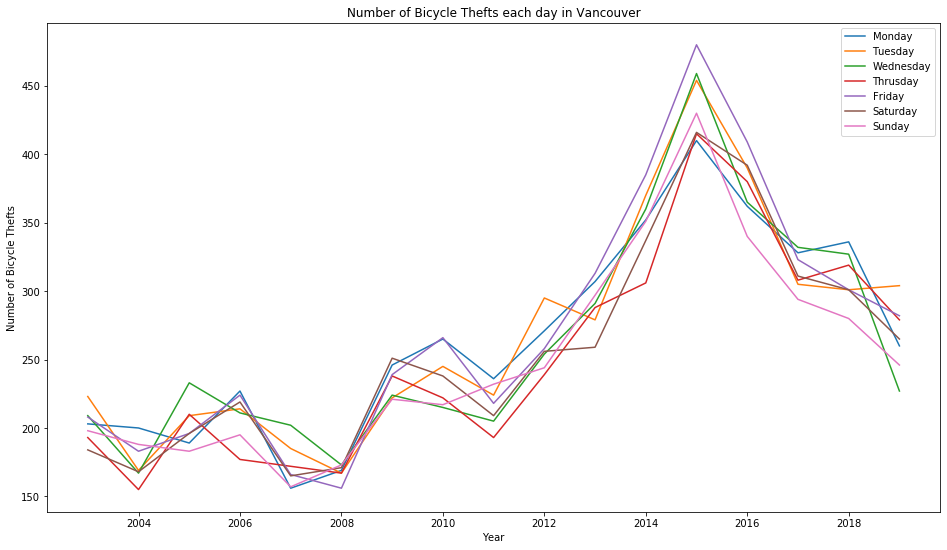

In [9]:
plt.figure(figsize=(16, 9))
plt.plot(monday['YEAR'],monday['COUNT'], label='Monday')
plt.plot(tuesday['YEAR'],tuesday['COUNT'], label='Tuesday')
plt.plot(wednesday['YEAR'],wednesday['COUNT'], label='Wednesday')
plt.plot(thrusday['YEAR'],thrusday['COUNT'], label='Thrusday')
plt.plot(friday['YEAR'],friday['COUNT'], label='Friday')
plt.plot(saturday['YEAR'],saturday['COUNT'], label='Saturday')
plt.plot(sunday['YEAR'],sunday['COUNT'], label='Sunday')

plt.xlabel("Year")
plt.ylabel("Number of Bicycle Thefts")
plt.title("Number of Bicycle Thefts each day in Vancouver")
plt.legend()
plt.show()

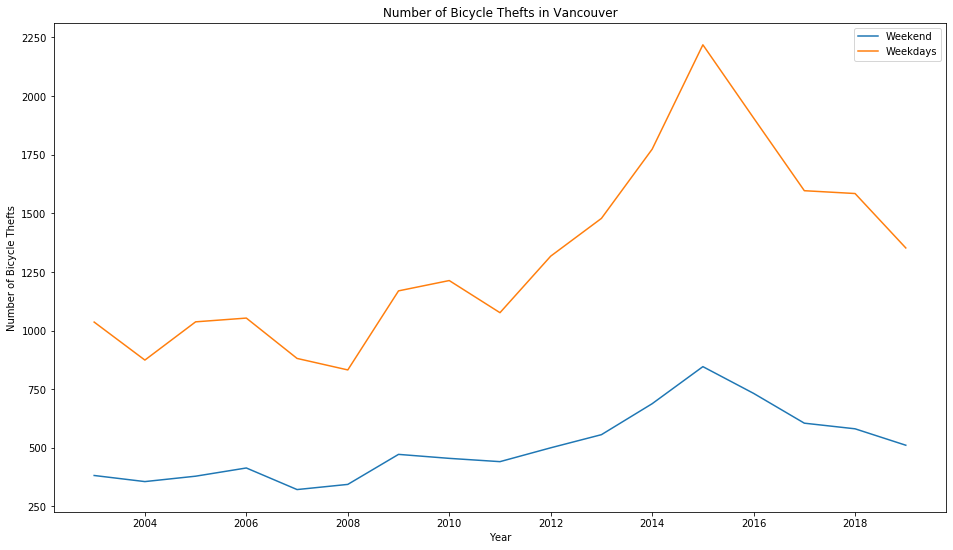

In [10]:
plt.figure(figsize=(16, 9))
plt.plot(weekend_tot['YEAR'],weekend_tot['COUNT'], label='Weekend')
plt.plot(weekdays_tot['YEAR'],weekdays_tot['COUNT'], label='Weekdays')
plt.xlabel("Year")
plt.ylabel("Number of Bicycle Thefts")
plt.title("Number of Bicycle Thefts in Vancouver")
plt.legend()
plt.show()